# Introduction to Deep Learning
## The Beginning - Linear perceptron and the concept of learning

* Structure of a neuron 
* Algorithmic concept concept behind learning.


## Inspiration - The Biological Neuron Model
**The Neuron cell takes a :**
* Binary input (of electrical signals), 
* Process it, and 
* Produce binary output (of electrical signal).

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/neuron3.PNG)

**Neuron Input**<br>
A neuron accepts inputs, usually from other neurons, through its dendrites, that are connect to other neurons via a gap called a synapse which assigns a "weight" to any specific input. <br>
All of these inputs are processed together in the cell body (soma)<br>

**Neuron Output**<br>
The Neurons process the combination of the inputs, and if it exceeds a certain threshold, an output signal is produced (the neuron "fires")<br>
When the neuron fires, the signal (output) travels along the axon to the synapse terminals,there it assigned a "weight", and continue to the dendrites of other neurons through the synapse.<br>
With this biological model in mind, we can define a mathematical artificial neuron.

## Perceptron - An Artificial Neural Network
As in the Biological model, we want the neuron to intake an inputs, process it (weighted sum) and if it exceeds a threshold, the neuron will produce an output. 

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/perceptron_paradigma3.png)


## Decision Units - Activation functions
There are many options for decision units, and we will see later. Lets start with the basic one, defined by McCulloch-Pitts (1943)
### Binary threshold unit
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/part1_form1.JPG)



In [1]:
!git clone https://github.com/naomifridman/Introduction_to_deep_learning.git

fatal: destination path 'Introduction_to_deep_learning' already exists and is not an empty directory.


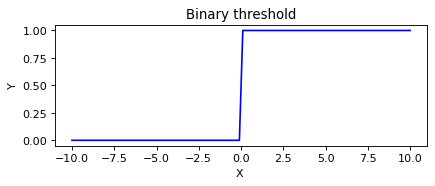

In [2]:
import Introduction_to_deep_learning.utils_plot as uplot
uplot.drow_binary_threshold()

## Learning the Bias
Now we need to learn the weights and the bias. But we can use a trick, to avoid separate scheme, for learning the bias. 
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/part1_form2.JPG)
> This way, we can learn the bias as it was part of the weights. 

## Learning weights
The idea is to go over the samples, and correct/update the weights according to the results on the samples.
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/dl3.jpg)
#### Update the weights
There are many strategies to update the weights, and we will see them later.


### Perceptron Example - Logic OR
Lets build a Perceptron, that performs a logic OR:


X1 | X2 | OR
--- | --- | ---
*0* | 0 | **0**
*1* | 0 | **1**
*0* | 1 | **1**
*1* | 1 | **1**

* $X$ is the input
* $w$ are the weights
* $X*w$ is the input to the activation function
$$z = Xw$$
* $\hat{y}$ is the 0/1 output from activation
$$ \hat{y} = \begin{cases} 1 & z \geqslant  0\\ 0 & otherwise \end{cases}$$


The scheme will be to Go over all training cases in any order, and:
  * If the output is correct, continue
  * If output < label  (increase $w$): $\to{w} = {w} + {X}_{i}$
  * If output > label (decrease $w$): $\to{w} = {w} - {X}_{i}$

## Lets run Simulation of this simple example
**epoch:  0**


0 x= [1 0 0] w= [ 0.  0.  0.] Wx=  0.0 y= 0 correct no update

1 x= [1 1 0] w= [ 0.  0.  0.] Wx=  0.0 y: 1 **yhat > y => W updated: [ 1.  1.  0.]**

2 x: [1 0 1] w= [ 1.  1.  0.] Wx=  1.0 y: 1 correct no update

3 x= [1 1 1] w= [ 1.  1.  0.] Wx=  2.0 y: 1 correct no update

--------------------------
**epoch:  1**

0 x: [1 0 0] w: [ 1.  1.  0.] Wx: 1.0 y: 0 **yhat > y  => W updated: [ 0.  1.  0.]**

1 x: [1 1 0] w: [ 0.  1.  0.] Wx:  1.0 y: 1 correct no update

2 X: [1 0 1] w: [ 0.  1.  0.] Wx: 0.0 y: 1 **yhat < y => W updated: [ 1.  1.  1.]**

3 x: [1 1 1] w: [ 1.  1.  1.] Wx:  3.0 y: 1 correct no update

--------------------------
**epoch:  2**

0 x: [1 0 0] w: [ 1.  1.  1.] Wx: 1.0 y: 0 **yhat < y => W updated: [ 0.  1.  1.]**

1 x: [1 1 0] w: [ 0.  1.  1.] Wx:  1.0 y: 1 correct no update

2 x: [1 0 1] w: [ 0.  1.  1.] Wx:  1.0 y: 1 correct no update

3 x: [1 1 1] w: [ 0.  1.  1.] Wx:  2.0 y: 1 correct no update

#### With W = (0., 1., 1.) the perceptron can solve OR logic gate

### Re-train Percepron to Preform logic AND
Same perceptron,can learn to perform logic AND, When its trained on the correct data:

Bias |X1 | X2 | AND
-----|--- | --- | ---
1    |*0* | 0 | **0**
1    |*1* | 0 | **0**
1    |*0* | 1 | **0**
1    |*1* | 1 | **1**

#### W= (-2.  1.  2.) that solves AND logic gate.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import Introduction_to_deep_learning.utils_plot as uplot
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss
%matplotlib inline  

epoch:  0
0 w*x==0 x [1 0 0] w [0. 0. 0.] dot 0.0 y 0
correct
1 w*x==0 & y==1 X [1 1 0] w [0. 0. 0.] dot 0.0 y 1
W updated to:  [1. 1. 0.]
2 w*x==0 x [1 0 1] w [1. 1. 0.] dot 1.0 y 1
correct
epoch:  1
0 w*x==1 & y==0 X [1 0 0] w [1. 1. 0.] dot 1.0 y 0
W updated to:  [0. 1. 0.]
1 w*x==0 x [1 1 0] w [0. 1. 0.] dot 1.0 y 1
correct
2 w*x==0 & y==1 X [1 0 1] w [0. 1. 0.] dot 0.0 y 1
W updated to:  [1. 1. 1.]
epoch:  2
0 w*x==1 & y==0 X [1 0 0] w [1. 1. 1.] dot 1.0 y 0
W updated to:  [0. 1. 1.]
1 w*x==0 x [1 1 0] w [0. 1. 1.] dot 1.0 y 1
correct
2 w*x==0 x [1 0 1] w [0. 1. 1.] dot 1.0 y 1
correct
epoch:  3
0 w*x==0 x [1 0 0] w [0. 1. 1.] dot 0.0 y 0
correct
1 w*x==0 x [1 1 0] w [0. 1. 1.] dot 1.0 y 1
correct
2 w*x==0 x [1 0 1] w [0. 1. 1.] dot 1.0 y 1
correct
epoch:  4
0 w*x==0 x [1 0 0] w [0. 1. 1.] dot 0.0 y 0
correct
1 w*x==0 x [1 1 0] w [0. 1. 1.] dot 1.0 y 1
correct
2 w*x==0 x [1 0 1] w [0. 1. 1.] dot 1.0 y 1
correct
Leared Weights: [0. 1. 1.]


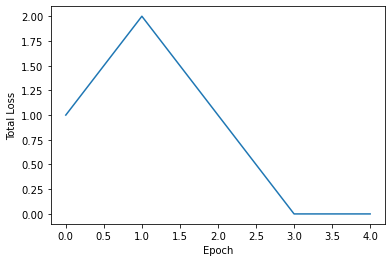

In [4]:
import numpy as np
def perceptron_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.
    
    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 5
    errors = []

    for t in range(n):
        
        print('epoch: ' , t)
        total_error = 0
        
        for i, x in enumerate(X):
            
            
            if (np.dot(X[i], w) == Y[i]):
                print(i, 'w*x==0', 'x',X[i],'w', w,'dot', np.dot(X[i], w), 'y',Y[i])
                print('correct')
                continue
                
            elif (np.dot(X[i], w) == 0 and Y[i] == 1):
                total_error += 1
                print(i, 'w*x==0 & y==1', 'X',X[i],'w', w,'dot',
                      np.dot(X[i], w), 'y',Y[i])
        
                
                w = w + X[i]
                print('W updated to: ', w)
                
            elif (np.dot(X[i], w) == 1 and Y[i] == 0):
                total_error += 1
                print(i, 'w*x==1 & y==0' ,'X',X[i],'w', w,'dot', 
                      np.dot(X[i], w), 'y',Y[i], )
                
                w = w - X[i]
                print('W updated to: ', w)
                
        errors.append(total_error)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return w

X = [[1,0,0],
    [1,1,0],
    [1,0,1],
    [1,1,1]]
y = [0, 1, 1, 1]
w=perceptron_plot(np.array(X),y)
print('Leared Weights:', w)
